Import libraries

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
import numpy as np
import pandas as pd
from sklearn import datasets, svm, cross_validation, tree, preprocessing, metrics
import sklearn.ensemble as ske

/Users/scottvirshup/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Load training data

In [2]:
train = pd.read_csv("train.csv")

In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Do some initial exploratory analysis

Bar Charts

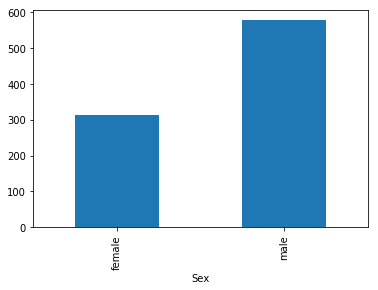

In [17]:
# count of male and female
bar1 = train.groupby(['Sex'])['Sex'].count()

bar1.plot.bar()

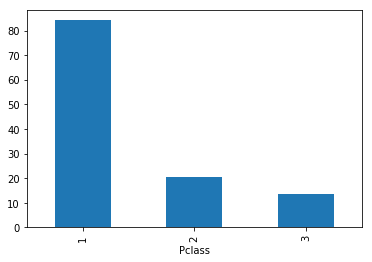

In [18]:
# average fare by class
bar2 = train.groupby(['Pclass'])['Fare'].mean()

bar2.plot.bar()

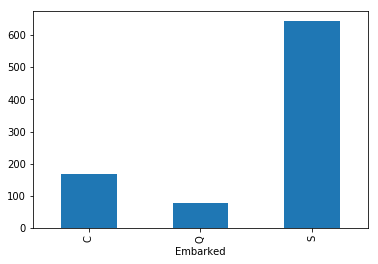

In [20]:
# Number of passengers from each point of departure
bar3 = train.groupby(['Embarked'])['Embarked'].count()

bar3.plot.bar()

In [ ]:
# Scatter between age and fare
scatter1 = train.groupby([Scatter])

In [22]:
bar4 = train['Embarked'].count()
bar4.plot.bar()

AttributeError: 'numpy.int64' object has no attribute 'plot'

Drop unnecessary variables for our regression. We drop ones that do not play a part in the calculation of our model

In [ ]:
# drop those variables from both train and test sets
train = train.drop(['PassengerId','Name','Cabin','Ticket','Parch','SibSp'], axis=1)

Remove nulls from remaining columns

In [19]:
train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [ ]:
train = train.dropna()

Identify datatypes of the dataset. Use this to change objects to numbers

In [27]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Turn male/female into 0/1